# CHAPTER 11 Measuring Error

## Estimating Uncertainty in Your Model with a Simulation

In [11]:
require(forecast)

In [12]:
phi <- 0.7
time_steps <- 24
N <- 1000
sigma_error <- 1

In [13]:
sd_series <- sigma_error^2 / (1 - phi^2)
starts <- rnorm(N, sd = sqrt(sd_series))
estimates <- numeric(N)
res <- numeric(time_steps)

In [14]:
for (i in 1:N) {
  errs = rnorm(time_steps, sd = sigma_error)
  res[1] <- phi * starts[i] + errs[1]

  for (t in 2:time_steps) {
    res[t] <- phi * res[t - 1] + errs[t]
  }

  estimates[i] <- arima(res, c(1, 0, 0))$coef[1]
}

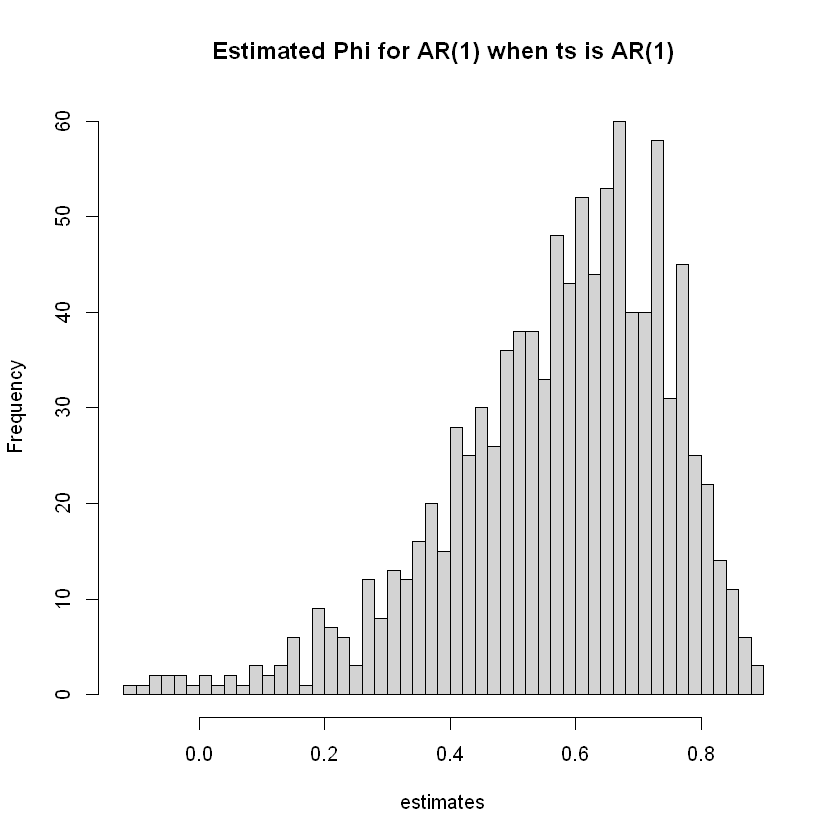

In [15]:
hist(estimates,
    main = "Estimated Phi for AR(1) when ts is AR(1)",
    breaks = 50)

In [16]:
summary(estimates)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-0.1101  0.4732  0.6013  0.5722  0.7041  0.8921 

In [17]:
## now let's assume we have a true AR(2) process
## because this is more complicated, we switch over to arima.sim
phi_1 <- 0.7
phi_2 <- -0.2

In [18]:
estimates <- numeric(N)

for (i in 1:N) {
  res <- arima.sim(list(order = c(2,0,0),
                ar = c(phi_1, phi_2)),
                n = time_steps)
  estimates[i] <- arima(res, c(1, 0, 0))$coef[1]
}

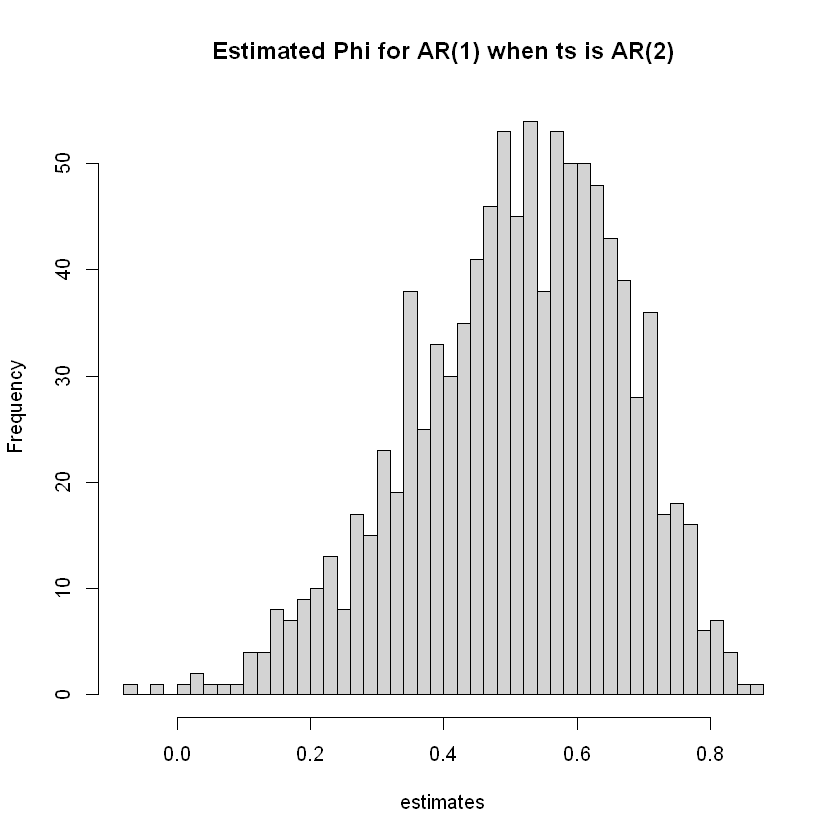

In [19]:
hist(estimates,
        main = "Estimated Phi for AR(1) when ts is AR(2)",
        breaks = 50)

In [20]:
summary(estimates)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-0.07273  0.40830  0.52189  0.50908  0.62419  0.87709 